# Df 0 0 3_Profiles
This tutorial illustrates how to use TProfiles in combination with the
RDataFrame. See the documentation of TProfile and TProfile2D to better
understand the analogy of this code with the example one.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 12:59 AM.</small></i>

  A simple helper function to fill a test tree: this makes the example
 stand-alone.
 

In [1]:
%%cpp -d
void fill_tree(const char *treeName, const char *fileName)
{
   ROOT::RDataFrame d(25000);
   d.Define("px", []() { return gRandom->Gaus(); })
      .Define("py", []() { return gRandom->Gaus(); })
      .Define("pz", [](double px, double py) { return sqrt(px * px + py * py); }, {"px", "py"})
      .Snapshot(treeName, fileName);
}

We prepare an input tree to run on

In [2]:
auto fileName = "df003_profiles.root";
auto treeName = "myTree";
fill_tree(treeName, fileName);

We read the tree from the file and create a rdataframe.

In [3]:
ROOT::RDataFrame d(treeName, fileName, {"px", "py", "pz"});

Create the profiles

In [4]:
auto hprof1d = d.Profile1D({"hprof1d", "Profile of pz versus px", 64, -4, 4});
auto hprof2d = d.Profile2D({"hprof2d", "Profile of pz versus px and py", 40, -4, 4, 40, -4, 4, 0, 20});

And draw

In [5]:
auto c1 = new TCanvas("c1", "Profile histogram example", 200, 10, 700, 500);
hprof1d->DrawClone();
auto c2 = new TCanvas("c2", "Profile2D histogram example", 200, 10, 700, 500);
hprof2d->DrawClone("BOX");

Draw all canvases 

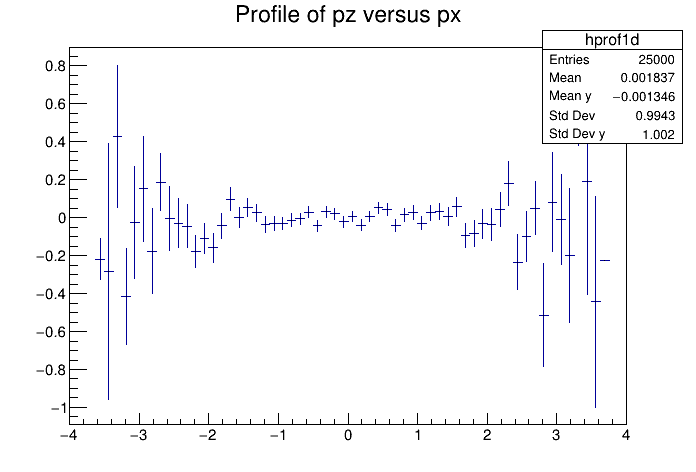

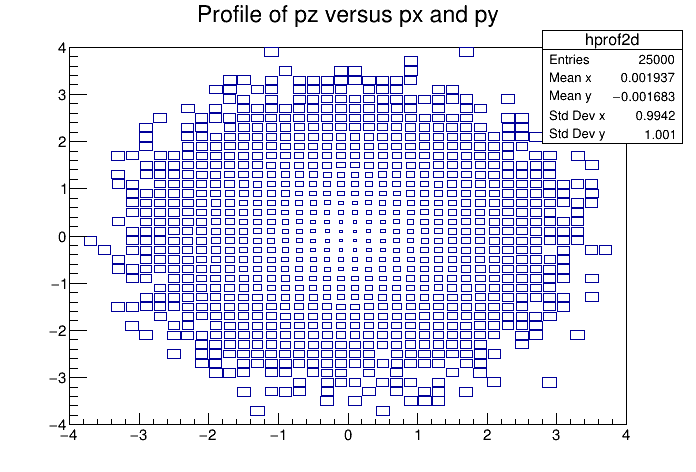

In [6]:
gROOT->GetListOfCanvases()->Draw()